# Analysis of NYC public schools results in ELA and math grades 3-8.

<span style="color: red;">**If kernel can't connect to server again run command:**
*netsh winsock reset*<span>

## Table of contents

1. [Data sources](#data)
4. [Performace levels: definions](#levels_definition)
2. [Imports: modules](#modules)
3. [Read data](#read_data)
5. [Analysis](#analysis)
    1. [Share of students with results MATH "Level 4" in all NYC public schools by year (Grades 3-8)](#share)
    1. [Math results timeseries chart: NYC](#city)
    1. [Middle Schools (grades 6-8) test results by school district](#MS_charts_district)

<a id="data"></a> 
#### Data:
Data New York City grades 3-8 New York State English Language Arts and Math State Tests results 2013-2023: https://infohub.nyced.org/reports/academics/test-results

<a id="levels_definition"></a> 
#### Definitions of Performance Levels for the 2023 Grades 3-8 English Language Arts and Mathematics Tests  

**NYS Level 1**: Students performing at this level are below proficient in standards for their grade. They may demonstrate limited knowledge, skills, and practices embodied by the Learning Standards that are considered insufficient for the expectations at this grade. 

**NYS Level 2**: Students performing at this level are partially proficient in standards for their grade. They demonstrate knowledge, skills, and practices embodied by the Learning Standards that are considered partial but insufficient for the expectations at this grade. Students performing at Level 2 are considered on track to meet current New York high school graduation requirements but are not yet proficient in Learning Standards at this grade. 

**NYS Level 3**: Students performing at this level are proficient in standards for their grade. They demonstrate knowledge, skills, and practices embodied by the Learning Standards that are considered sufficient for the expectations at this grade.  

**NYS Level 4**: Students performing at this level excel in standards for their grade. They demonstrate knowledge, skills, and practices embodied by the Learning Standards that are considered more than sufficient for the expectations at this grade.  

*Source: NYSED, 2023, https://www.p12.nysed.gov/irs/ela-math/2023/ela-math-score-ranges-performance-levels-2023.pdf*

<a id="modules"></a> 
#### Imports: modules

In [24]:
import os
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.3f}'.format)

<a id="read_data"></a> 
#### Read data

In [53]:
basePath = r"G:\My Drive\Kids\NY school"

#Read math results
fileName_math = "school-math-results-2013-2023-(public).xlsx"
mathPath = os.path.join(basePath,fileName_math)
print(mathPath)
sheetName_math = "All"
mathResultsDF = pd.read_excel(mathPath, sheetName_math)

#Read ELA results
fileName_ELA = "school-ela-results-2013-2023-(public).xlsx"
ELAPath = os.path.join(basePath,fileName_ELA)
print(ELAPath)
sheetName_ELA = "All"
ELAResultsDF = pd.read_excel(ELAPath, sheetName_ELA)

G:\My Drive\Kids\NY school\school-math-results-2013-2023-(public).xlsx
G:\My Drive\Kids\NY school\school-ela-results-2013-2023-(public).xlsx


In [54]:
subject = 'ELA'

resultsDF = ELAResultsDF if subject == 'ELA' else mathResultsDF

In [55]:
resultsDF.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2023,All Students,24,454.833,4,16.667,5,20.833,11,45.833,4,16.667,15,62.500
1,01M015,P.S. 015 ROBERTO CLEMENTE,4,2023,All Students,17,453.647,1,5.882,6,35.294,8,47.059,2,11.765,10,58.824
2,01M015,P.S. 015 ROBERTO CLEMENTE,5,2023,All Students,30,440.500,10,33.333,11,36.667,7,23.333,2,6.667,9,30
3,01M015,P.S. 015 ROBERTO CLEMENTE,6,2023,All Students,1,s,s,s,s,s,s,s,s,s,s,s
4,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2023,All Students,72,s,s,s,s,s,s,s,s,s,s,s


In [56]:
resultsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42343 entries, 0 to 42342
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DBN               42343 non-null  object
 1   School Name       42343 non-null  object
 2   Grade             42343 non-null  object
 3   Year              42343 non-null  int64 
 4   Category          42343 non-null  object
 5   Number Tested     42343 non-null  int64 
 6   Mean Scale Score  42343 non-null  object
 7   # Level 1         42343 non-null  object
 8   % Level 1         42343 non-null  object
 9   # Level 2         42343 non-null  object
 10  % Level 2         42343 non-null  object
 11  # Level 3         42343 non-null  object
 12  % Level 3         42343 non-null  object
 13  # Level 4         42343 non-null  object
 14  % Level 4         42343 non-null  object
 15  # Level 3+4       42343 non-null  object
 16  % Level 3+4       42343 non-null  object
dtypes: int64(2),

In [57]:
# resultsDF.info() showed that most of the columns are objects instead of numbers and needed to be converted
resultsDF_colToConvert = ['Mean Scale Score',
 'Grade',                             
 '# Level 1',
 '% Level 1',
 '# Level 2',
 '% Level 2',
 '# Level 3',
 '% Level 3',
 '# Level 4',
 '% Level 4',
 '# Level 3+4',
 '% Level 3+4']
resultsDF[resultsDF_colToConvert] = resultsDF[resultsDF_colToConvert].apply(pd.to_numeric, errors = 'coerce')
resultsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42343 entries, 0 to 42342
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DBN               42343 non-null  object 
 1   School Name       42343 non-null  object 
 2   Grade             32599 non-null  float64
 3   Year              42343 non-null  int64  
 4   Category          42343 non-null  object 
 5   Number Tested     42343 non-null  int64  
 6   Mean Scale Score  42168 non-null  float64
 7   # Level 1         42168 non-null  float64
 8   % Level 1         42168 non-null  float64
 9   # Level 2         42168 non-null  float64
 10  % Level 2         42168 non-null  float64
 11  # Level 3         42168 non-null  float64
 12  % Level 3         42168 non-null  float64
 13  # Level 4         42168 non-null  float64
 14  % Level 4         42168 non-null  float64
 15  # Level 3+4       42168 non-null  float64
 16  % Level 3+4       42168 non-null  float6

In [58]:
# ELAResultsDF.info() showed that most of the columns are objects instead of numbers and needed to be converted
ELAResultsDF_colToConvert = ['Mean Scale Score',
 'Grade',                             
 '# Level 1',
 '% Level 1',
 '# Level 2',
 '% Level 2',
 '# Level 3',
 '% Level 3',
 '# Level 4',
 '% Level 4',
 '# Level 3+4',
 '% Level 3+4']
ELAResultsDF[ELAResultsDF_colToConvert] = ELAResultsDF[ELAResultsDF_colToConvert].apply(pd.to_numeric, errors = 'coerce')
ELAResultsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42343 entries, 0 to 42342
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DBN               42343 non-null  object 
 1   School Name       42343 non-null  object 
 2   Grade             32599 non-null  float64
 3   Year              42343 non-null  int64  
 4   Category          42343 non-null  object 
 5   Number Tested     42343 non-null  int64  
 6   Mean Scale Score  42168 non-null  float64
 7   # Level 1         42168 non-null  float64
 8   % Level 1         42168 non-null  float64
 9   # Level 2         42168 non-null  float64
 10  % Level 2         42168 non-null  float64
 11  # Level 3         42168 non-null  float64
 12  % Level 3         42168 non-null  float64
 13  # Level 4         42168 non-null  float64
 14  % Level 4         42168 non-null  float64
 15  # Level 3+4       42168 non-null  float64
 16  % Level 3+4       42168 non-null  float6

In [59]:
list(resultsDF.columns)

['DBN',
 'School Name',
 'Grade',
 'Year',
 'Category',
 'Number Tested',
 'Mean Scale Score',
 '# Level 1',
 '% Level 1',
 '# Level 2',
 '% Level 2',
 '# Level 3',
 '% Level 3',
 '# Level 4',
 '% Level 4',
 '# Level 3+4',
 '% Level 3+4']

In [32]:
uniqueValuesYears = resultsDF['Year'].unique()
uniqueValuesYears

array([2023, 2022, 2019, 2018, 2017, 2016, 2015, 2014, 2013], dtype=int64)

In [33]:
uniqueValuesGrades = resultsDF['Grade'].unique()
uniqueValuesGrades

array([ 3.,  4.,  5.,  6., nan,  7.,  8.])

In [34]:
uniqueValuesCategory = resultsDF['Category'].unique()
uniqueValuesCategory

array(['All Students'], dtype=object)

<a id="analysis"></a> 
## Analysis

<a id="share"></a>
#### Calculate share of students with results "Level 4" in all NYC public schools by year (Grades 3-8)

In [60]:
# Group by 'Year' and calculate the sum for '# Level 4' and 'Number Tested'
grouped_df = resultsDF.groupby('Year')[['# Level 4', 'Number Tested']].sum()

# Calculate the share of '# Level 4' values in 'Number Tested'
grouped_df['Share of # Level 4'] = grouped_df['# Level 4'] / grouped_df['Number Tested']

# Print the result
print(grouped_df['Share of # Level 4'])


Year
2013   0.080
2014   0.089
2015   0.100
2016   0.134
2017   0.156
2018   0.198
2019   0.205
2022   0.230
2023   0.227
Name: Share of # Level 4, dtype: float64


<a id="city"></a>
#### Test results timeseries, the whole city, grades (3-8)

In [61]:
columns_df = resultsDF.groupby('Year')[['# Level 1','# Level 2','# Level 3','# Level 4']].sum()
print(columns_df)

      # Level 1  # Level 2  # Level 3  # Level 4
Year                                            
2013 255334.000 287768.000 152427.000  60620.000
2014 245487.000 285549.000 160849.000  68061.000
2015 237063.000 275588.000 165424.000  75246.000
2016 188802.000 264960.000 198679.000 100739.000
2017 182128.000 253841.000 200199.000 117520.000
2018 165671.000 223634.000 214307.000 149009.000
2019 173345.000 209824.000 213249.000 153468.000
2022 129084.000 175005.000 168039.000 141759.000
2023 128046.000 151086.000 181269.000 135901.000


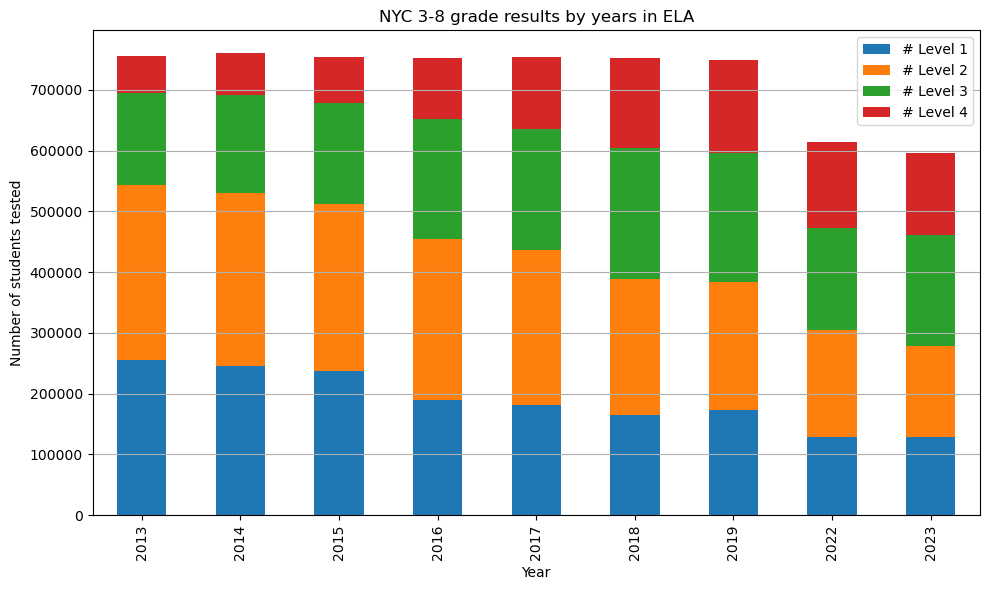

In [62]:
# Create a stacked bar chart
columns_df.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('NYC 3-8 grade results by years in ' + subject)  # Set the title
plt.xlabel('Year')  # X-axis label
plt.ylabel('Number of students tested')  # Y-axis label
plt.grid(axis='y')

plt.tight_layout()
plt.show() # Display the plot

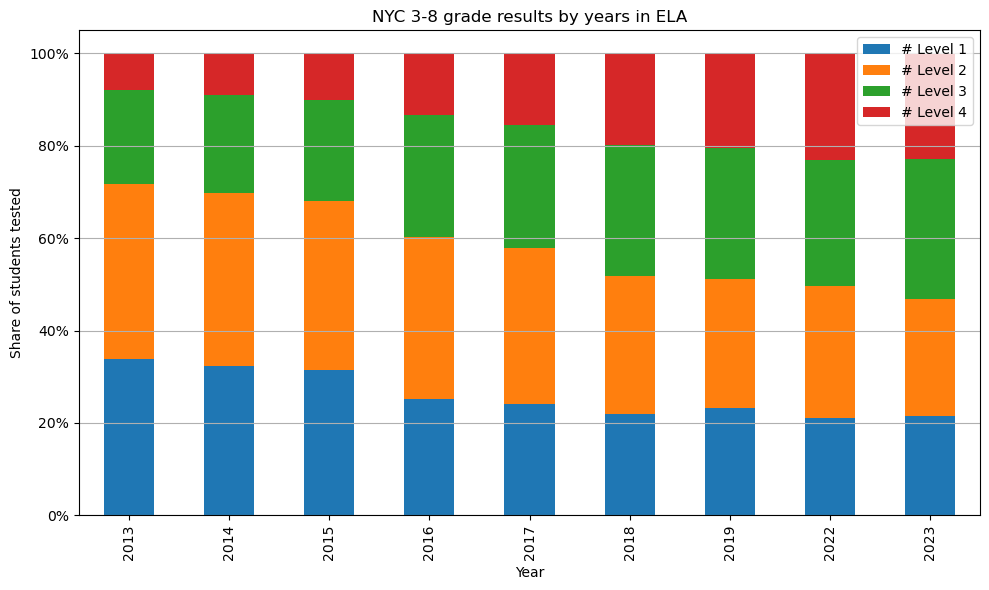

In [63]:
#Create a normalized bar chart
# 1. Normalize the dataframe rows to sum to 1
normalized_df = columns_df.div(columns_df.sum(axis=1), axis=0)

# 2. Plot the normalized dataframe
normalized_df.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('NYC 3-8 grade results by years in ' + subject)  # Set the title
plt.xlabel('Year')  # X-axis label
plt.ylabel('Share of students tested')  # Y-axis label
plt.grid(axis='y')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])  # Adjust y-ticks to percentage

plt.tight_layout()
plt.show()

<a id="MS_charts_district"></a>
#### Middle Schools (grades 6-8) test results by school district

In [39]:
dist01_MS_DF = resultsDF[(resultsDF['DBN'].str.startswith('01')) & (resultsDF['Grade'] >= 6)&(resultsDF['Grade'] <= 8)]
dist01_MS_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 3 to 854
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DBN               244 non-null    object 
 1   School Name       244 non-null    object 
 2   Grade             244 non-null    float64
 3   Year              244 non-null    int64  
 4   Category          244 non-null    object 
 5   Number Tested     244 non-null    int64  
 6   Mean Scale Score  243 non-null    float64
 7   # Level 1         243 non-null    float64
 8   % Level 1         243 non-null    float64
 9   # Level 2         243 non-null    float64
 10  % Level 2         243 non-null    float64
 11  # Level 3         243 non-null    float64
 12  % Level 3         243 non-null    float64
 13  # Level 4         243 non-null    float64
 14  % Level 4         243 non-null    float64
 15  # Level 3+4       243 non-null    float64
 16  % Level 3+4       243 non-null    float64
dt

In [40]:
dist01_MS_grouped = dist01_MS_DF.groupby('Year')[['# Level 1','# Level 2','# Level 3','# Level 4']].sum()
dist01_MS_grouped

,# Level 1,# Level 2,# Level 3,# Level 4
Year,,,,
2013,522.000,669.000,364.000,418.000
2014,417.000,670.000,445.000,413.000
2015,387.000,557.000,455.000,392.000
2016,286.000,657.000,475.000,413.000
2017,329.000,638.000,490.000,488.000
2018,330.000,516.000,466.000,626.000
2019,363.000,457.000,419.000,701.000
2022,248.000,406.000,409.000,546.000
2023,202.000,362.000,454.000,524.000


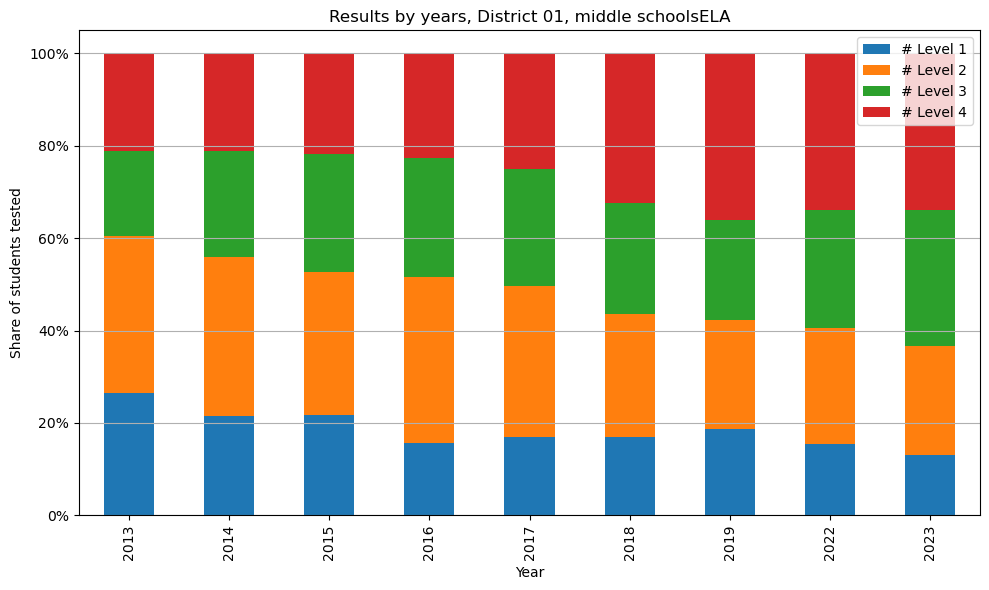

In [41]:
#Create a normalized bar chart
# 1. Normalize the dataframe rows to sum to 1
normalized_df = dist01_MS_grouped.div(dist01_MS_grouped.sum(axis=1), axis=0)

# 2. Plot the normalized dataframe
normalized_df.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Results by years, District 01, middle schools'+ subject)  # Set the title
plt.xlabel('Year')  # X-axis label
plt.ylabel('Share of students tested')  # Y-axis label
plt.grid(axis='y')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])  # Adjust y-ticks to percentage

plt.tight_layout()
plt.show()

#### Making middle school test results column charts by school districts

In [64]:
# Make a list of districts numbers in 2-digit format
districts = []
for i in range(1,33):
    prefix = str(i).zfill(2) #make sure that each number is represented as a two-character string, starting with 0 if necessary
    districts.append(prefix)
print(districts)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']


In [65]:
# Dictionaries to hold dataframes
district_dfs = {}
district_grouped_dfs = {}

#Create the dataframes
for i in districts:
    dfName = 'dist'+i+'_MS_DF_'+subject
    dfNameGrouped = dfName + '_grpd'
    district_dfs[dfName] = resultsDF[(resultsDF['DBN'].str.startswith(i)) & (resultsDF['Grade'] >= 6)&(resultsDF['Grade'] <= 8)]
    district_grouped_dfs[dfNameGrouped] = district_dfs[dfName].groupby('Year')[['# Level 1','# Level 2','# Level 3','# Level 4']].sum()
# To access a dataframe some_dataframe = district_dfs['distXX_MS_DF_XXXX']  # Replace XX with the desired district code    

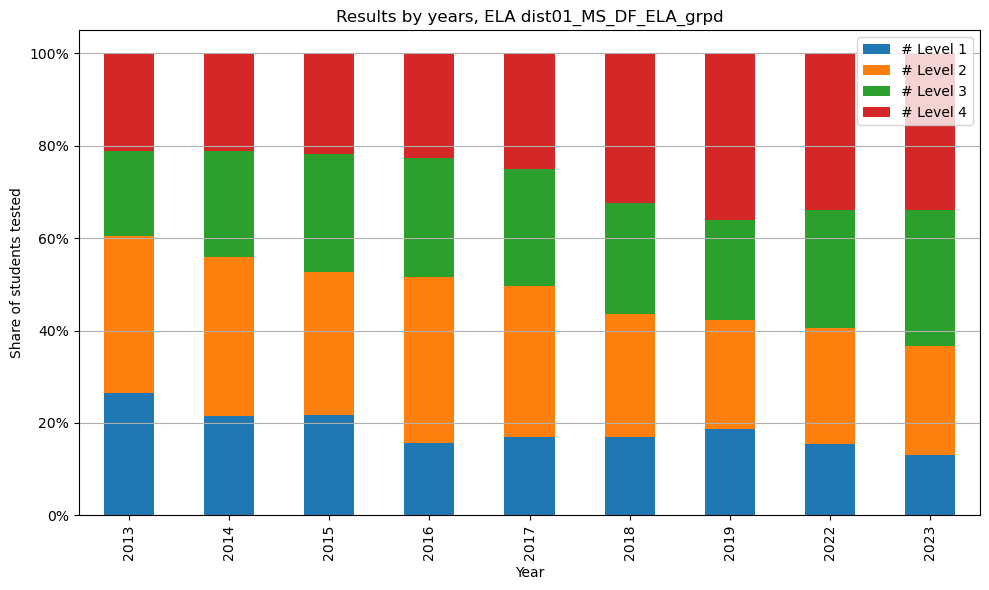

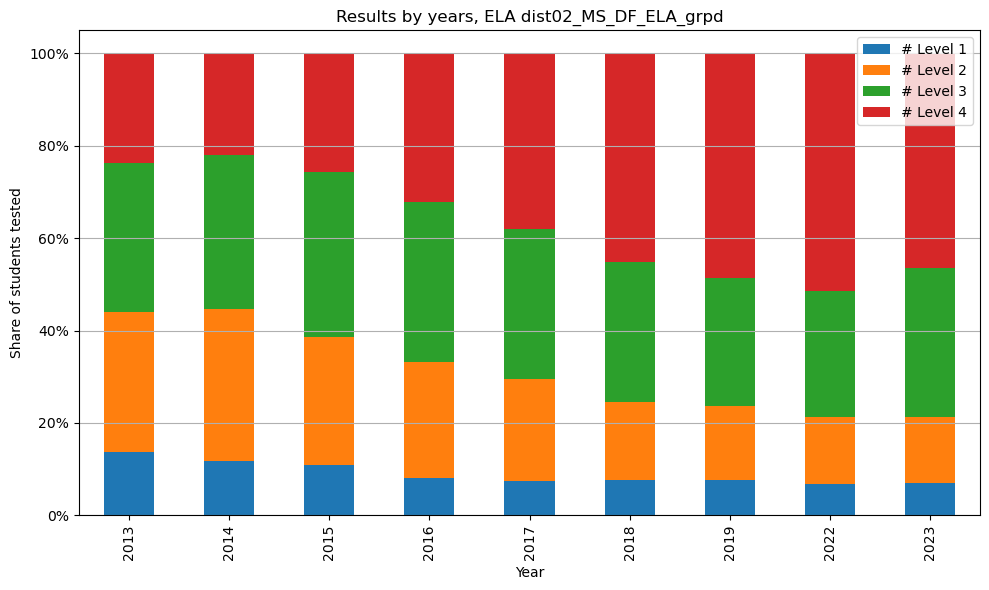

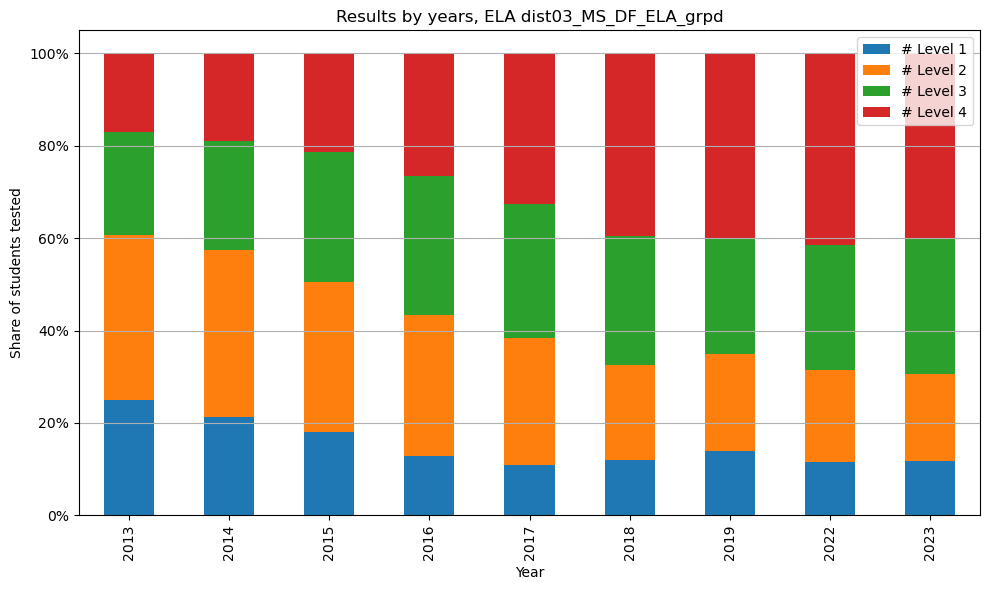

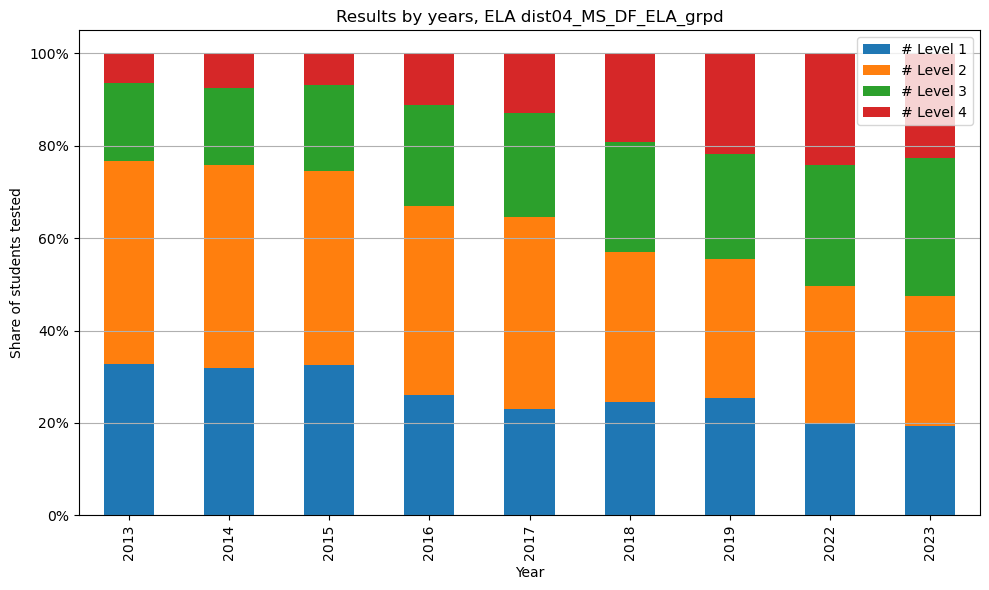

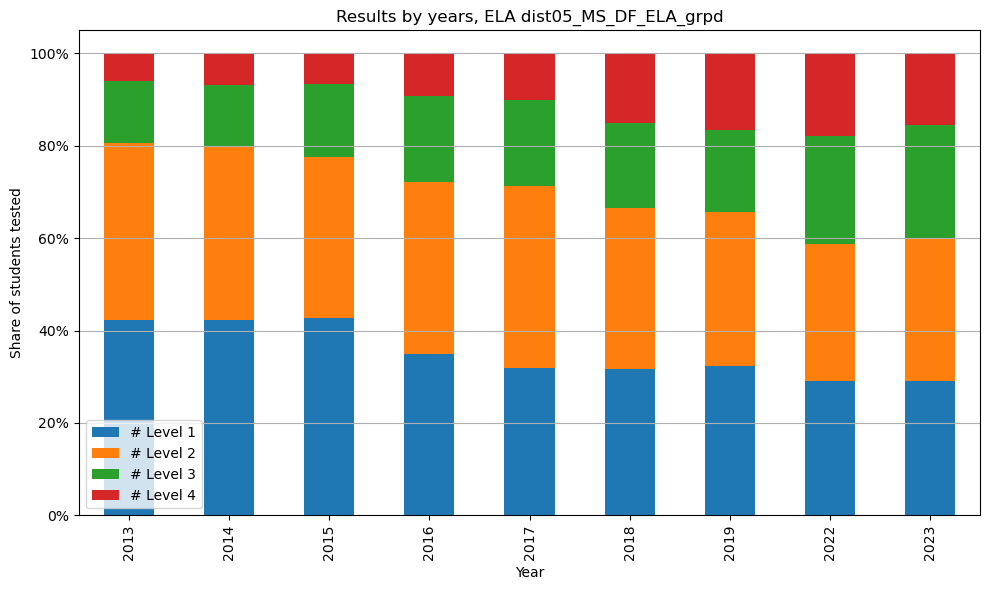

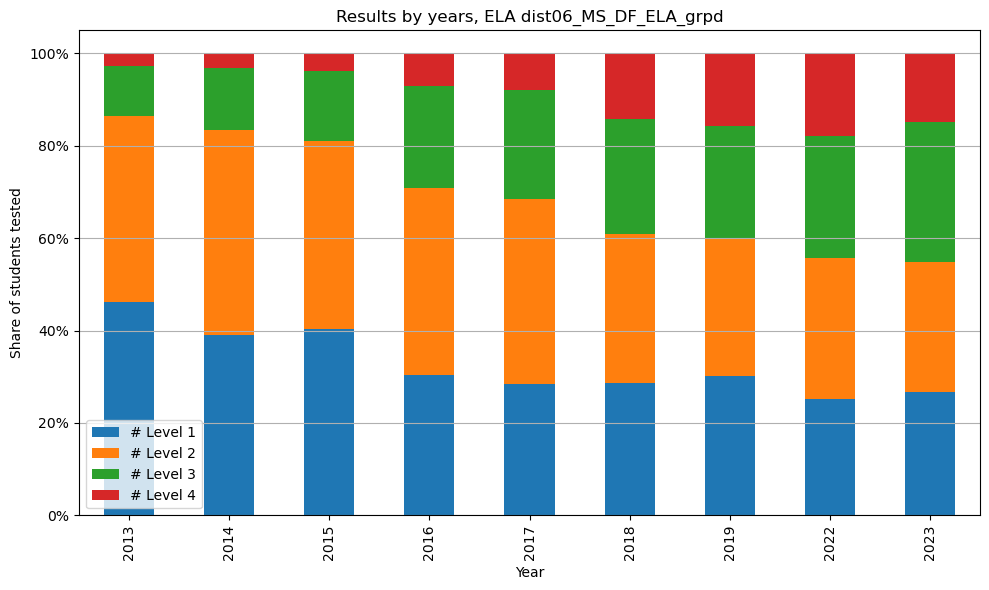

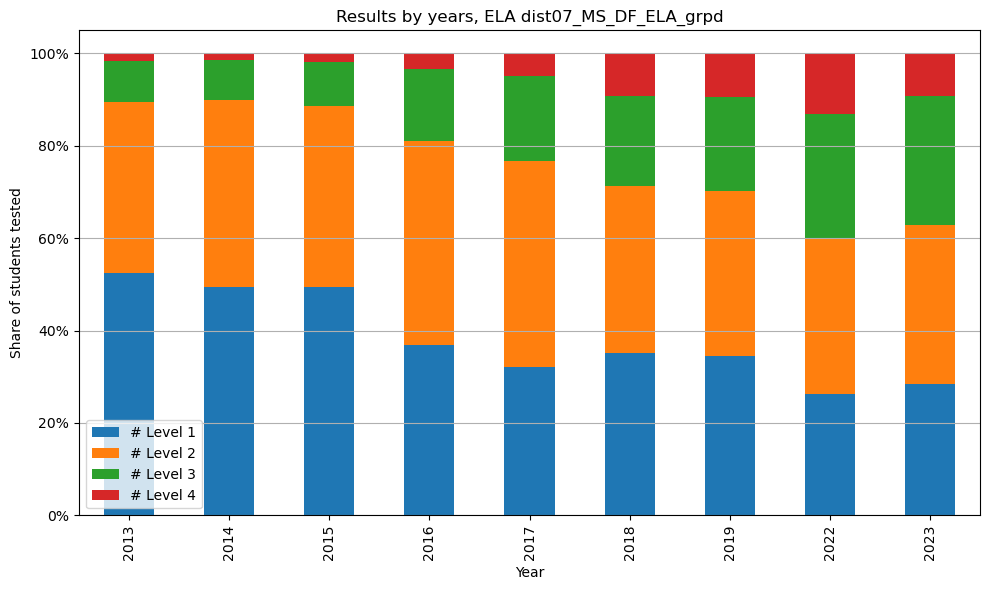

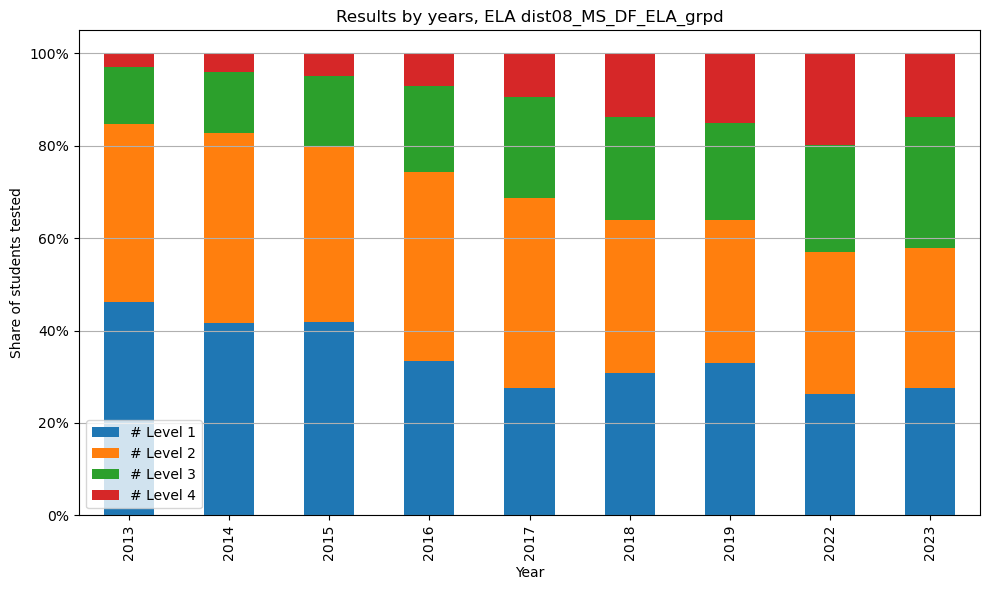

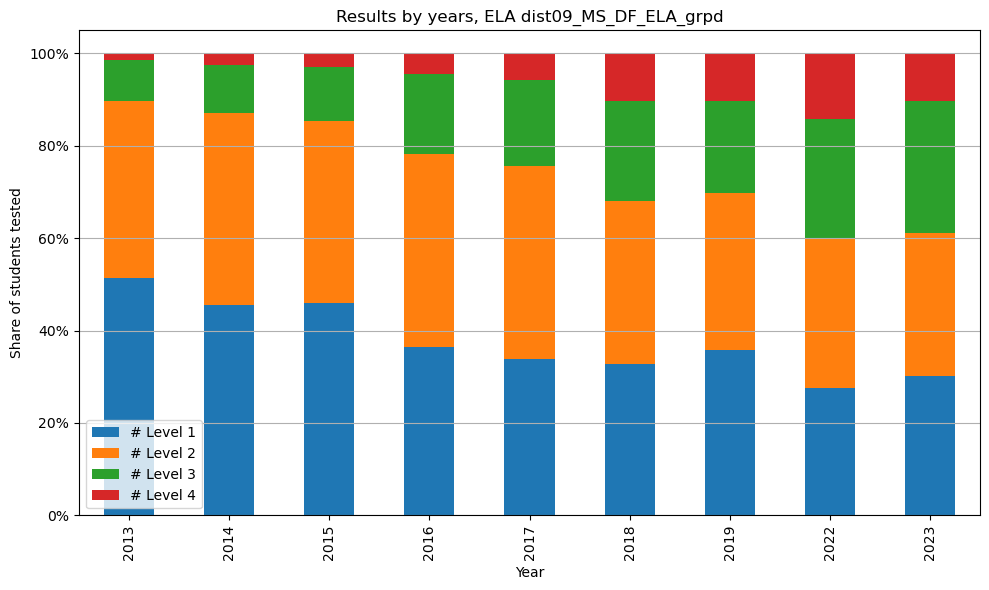

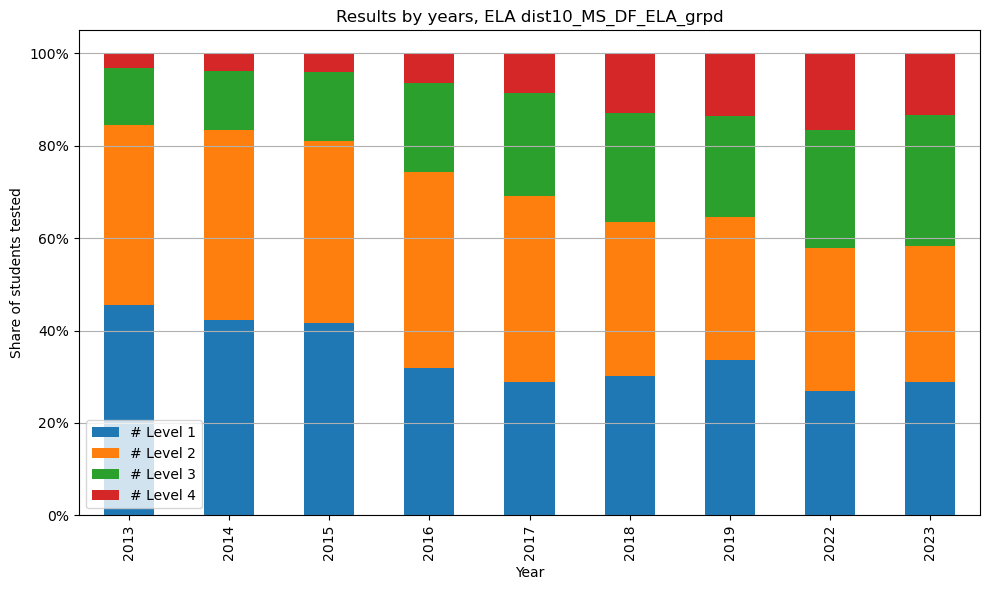

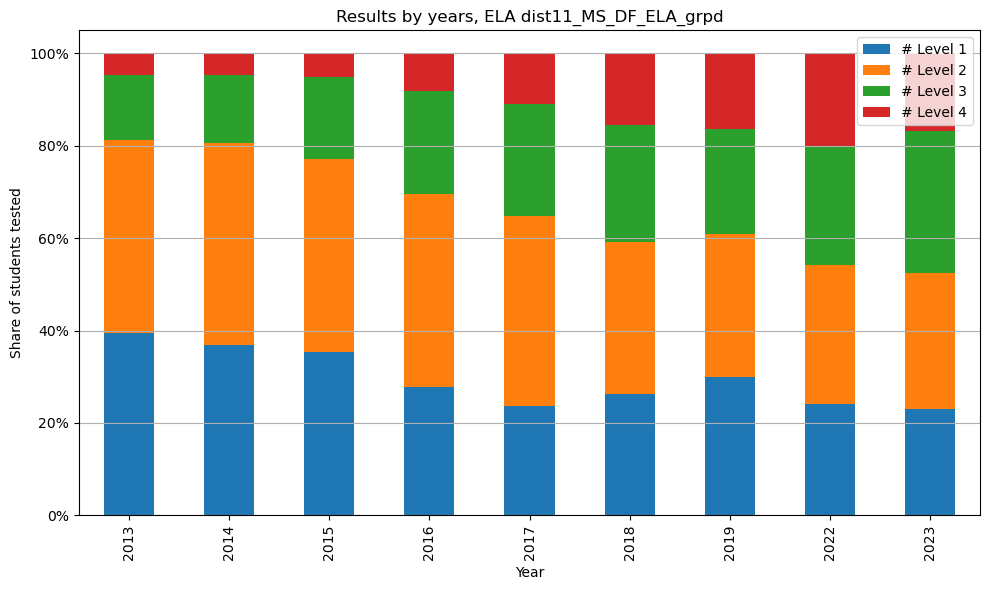

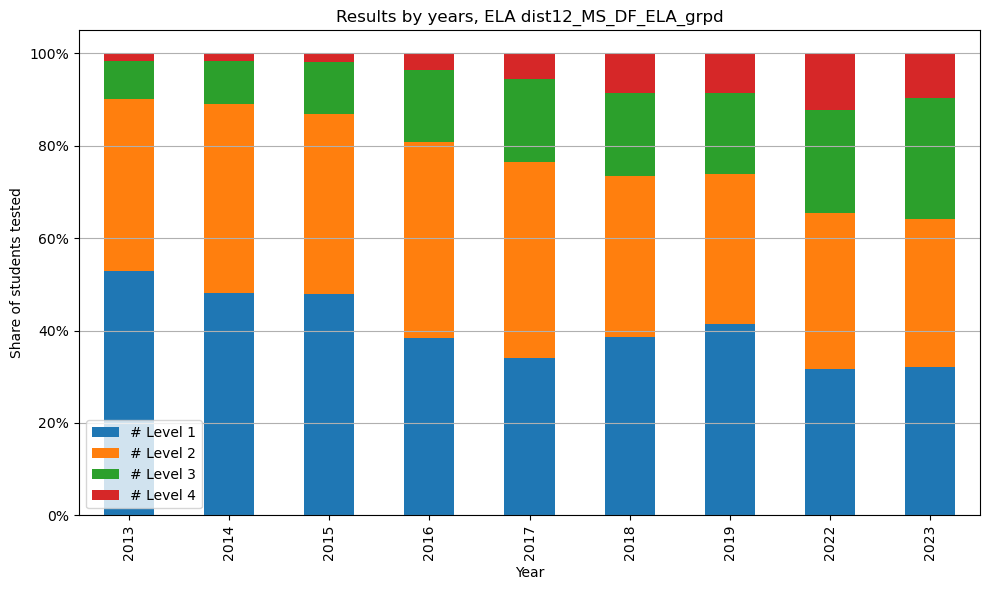

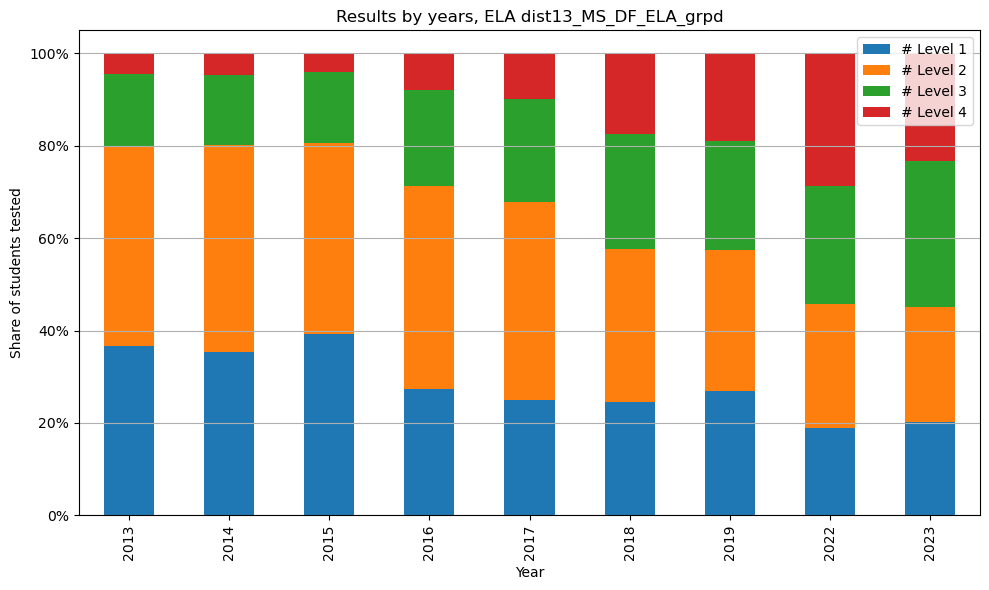

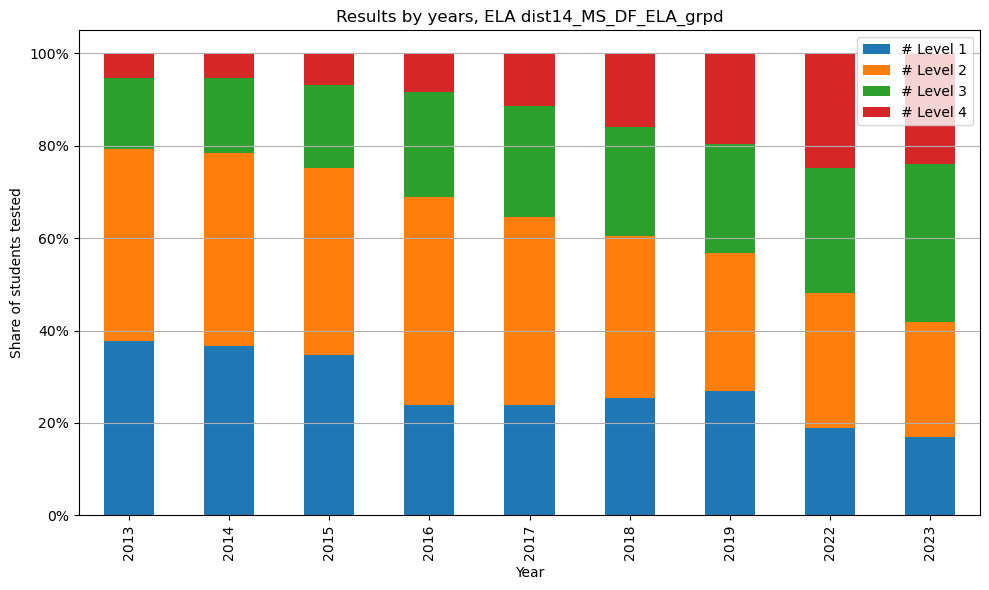

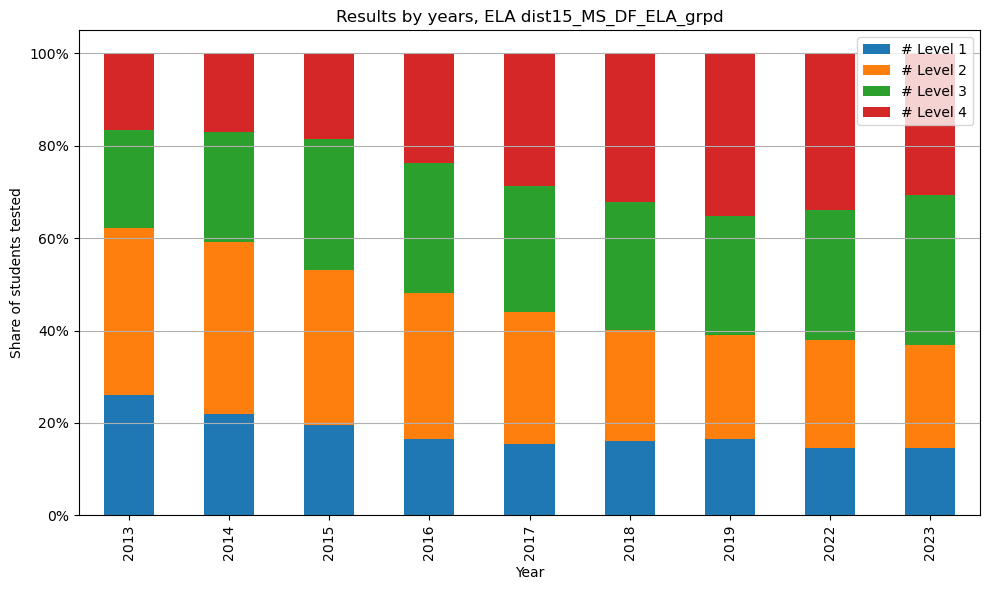

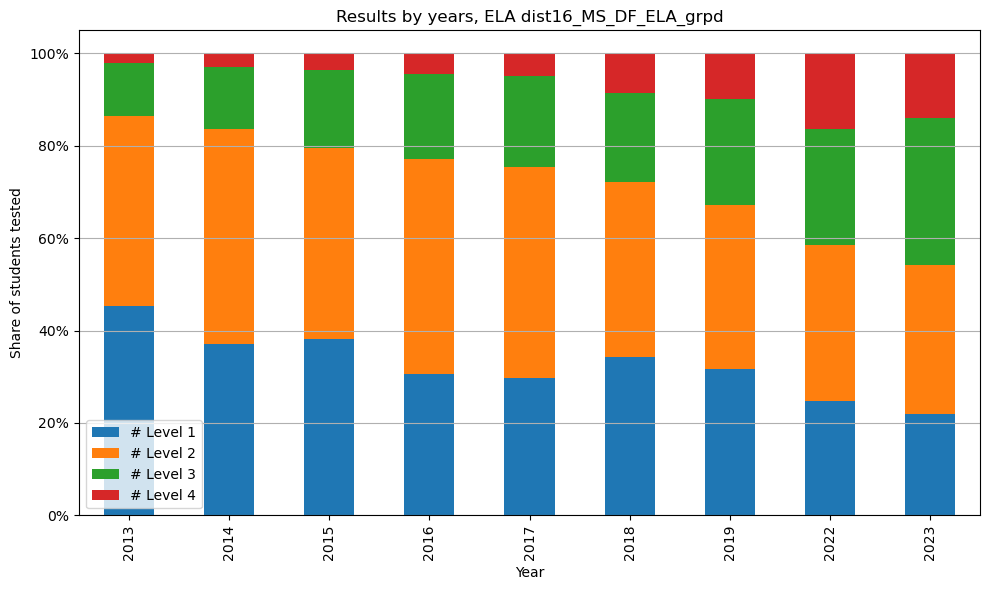

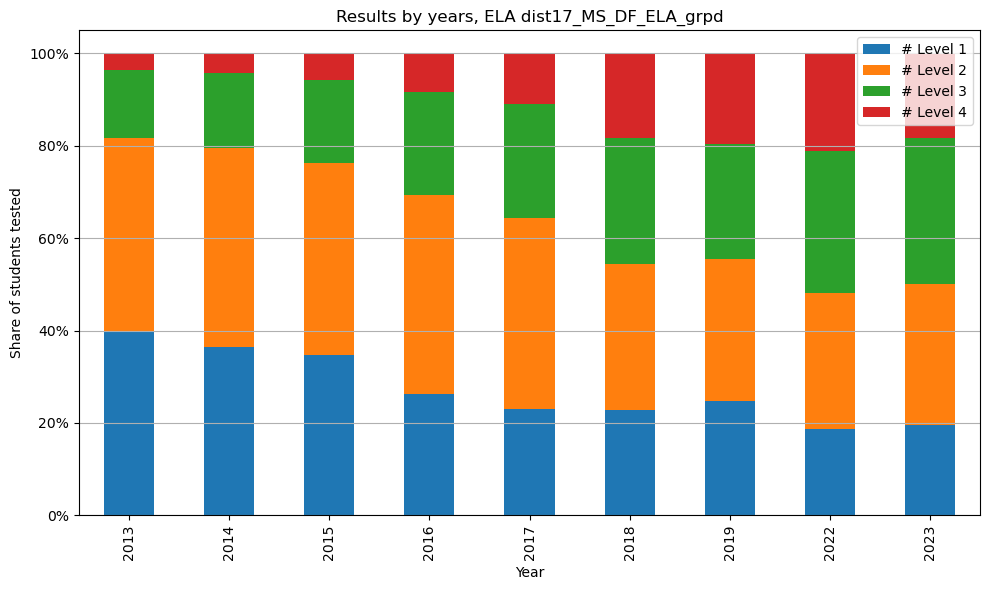

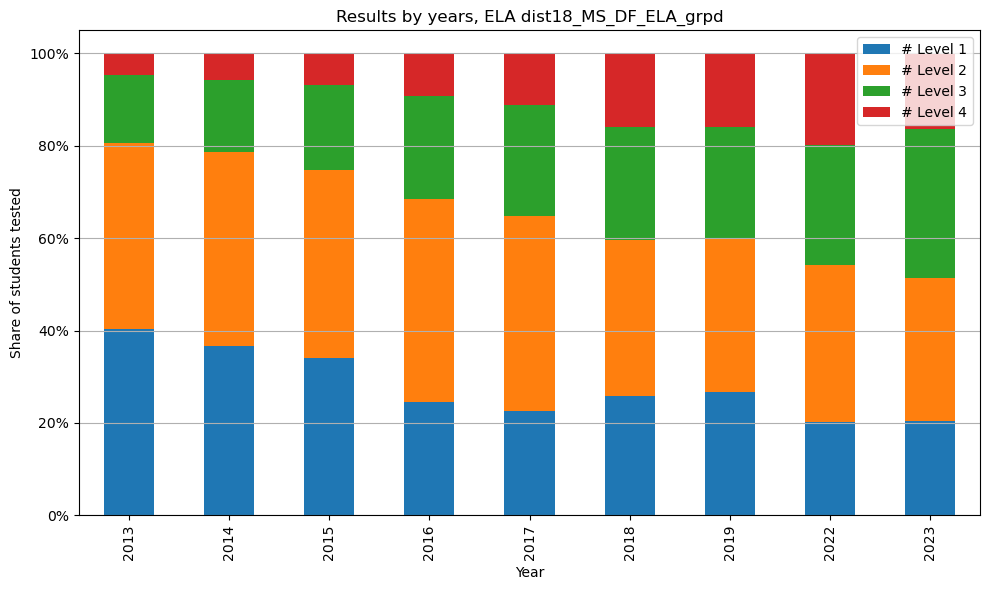

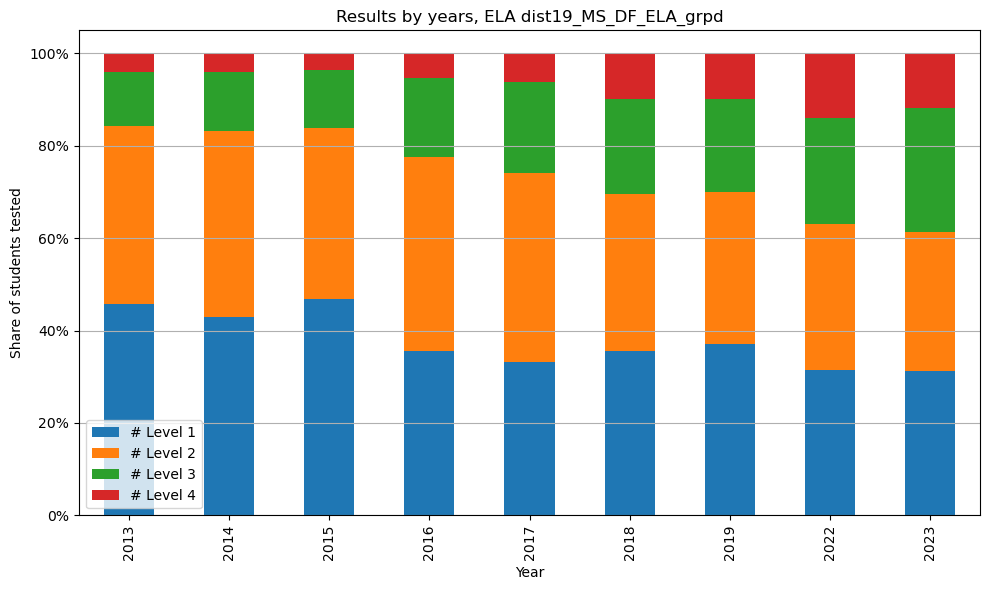

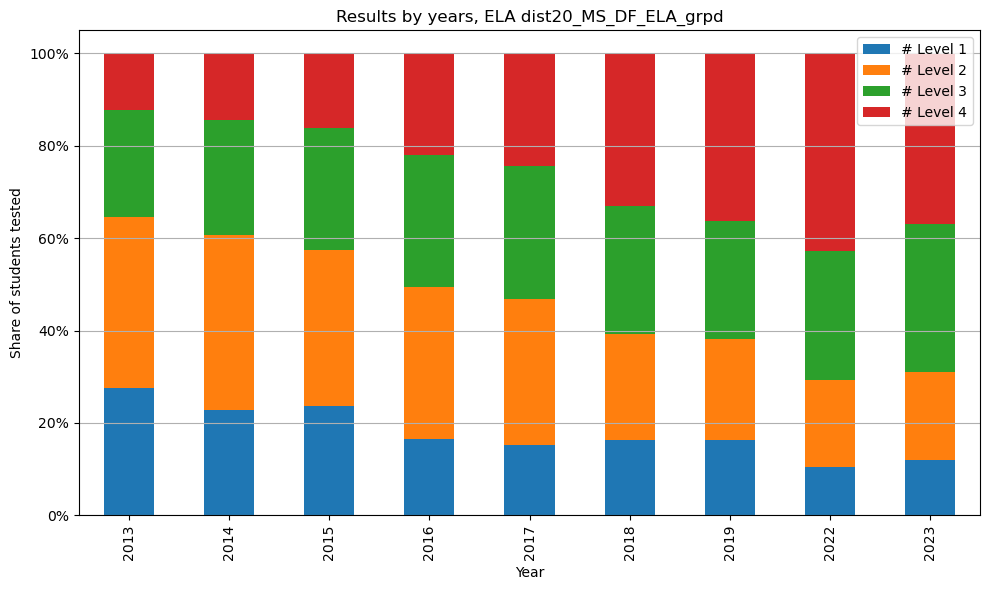

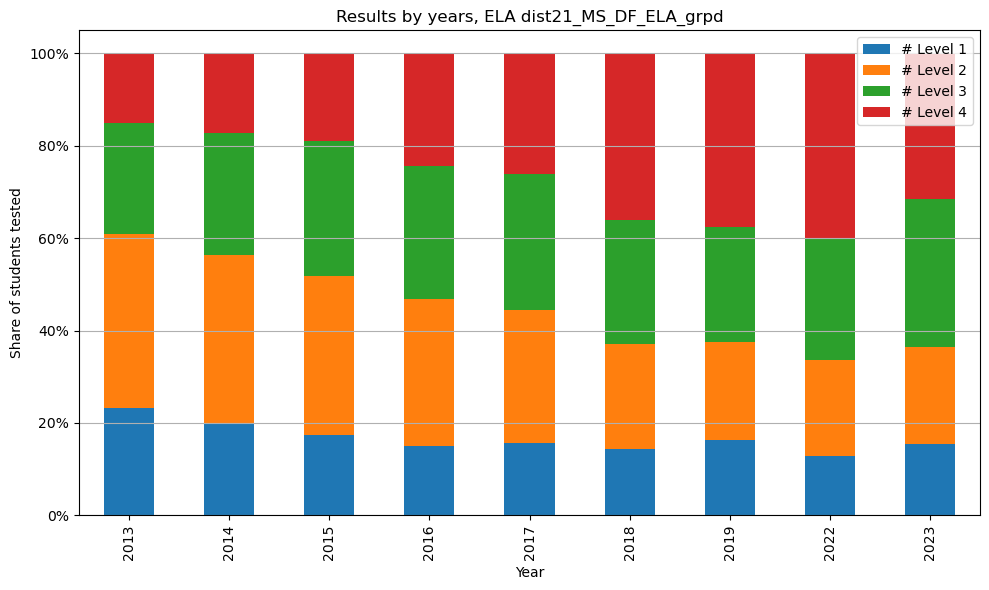

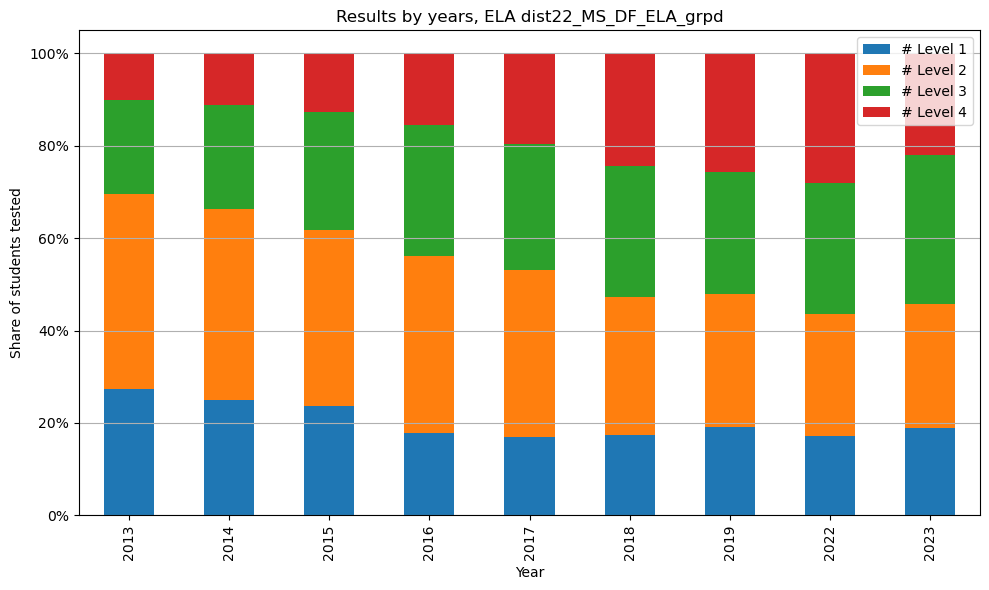

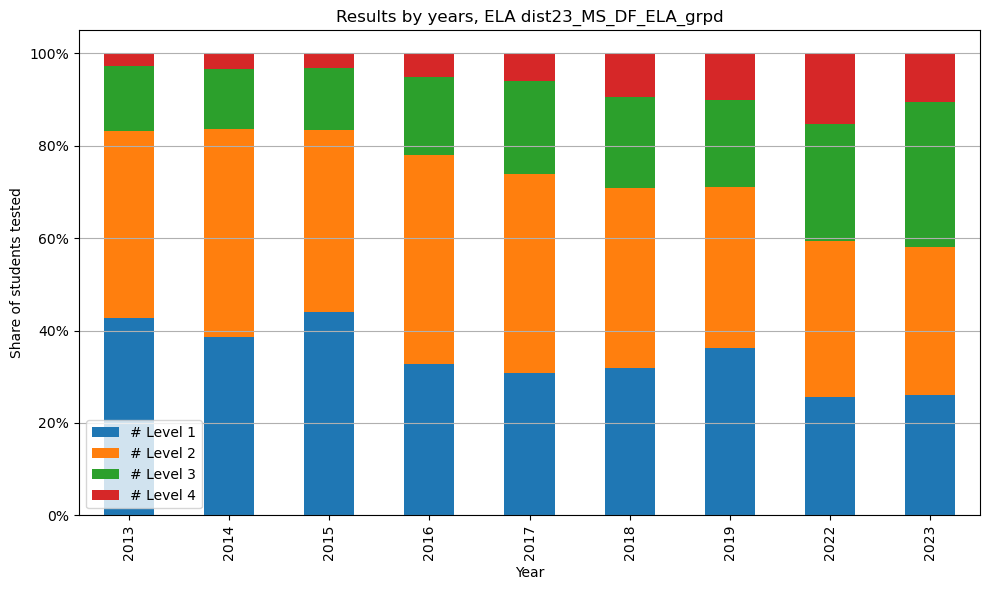

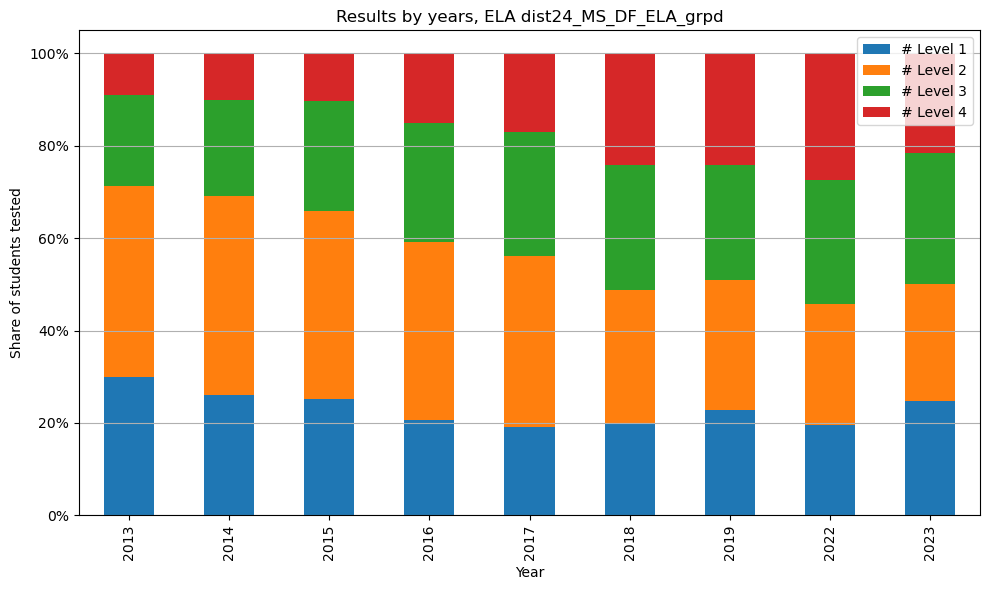

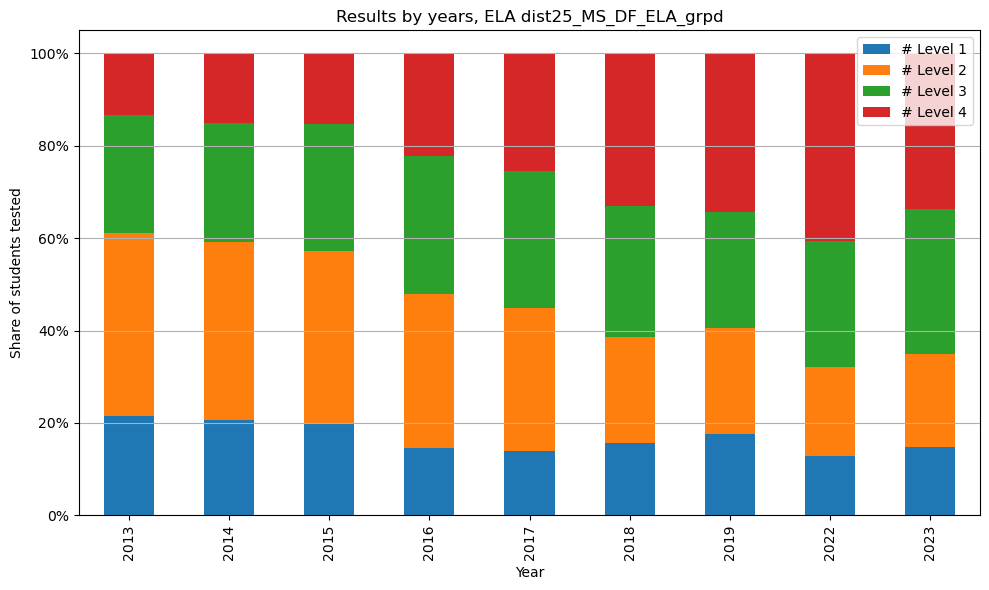

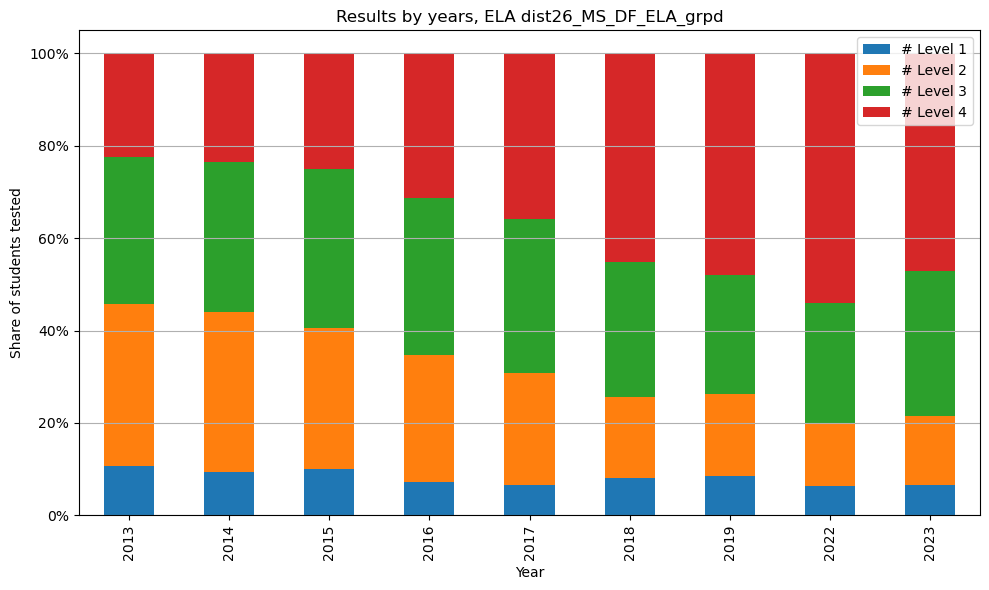

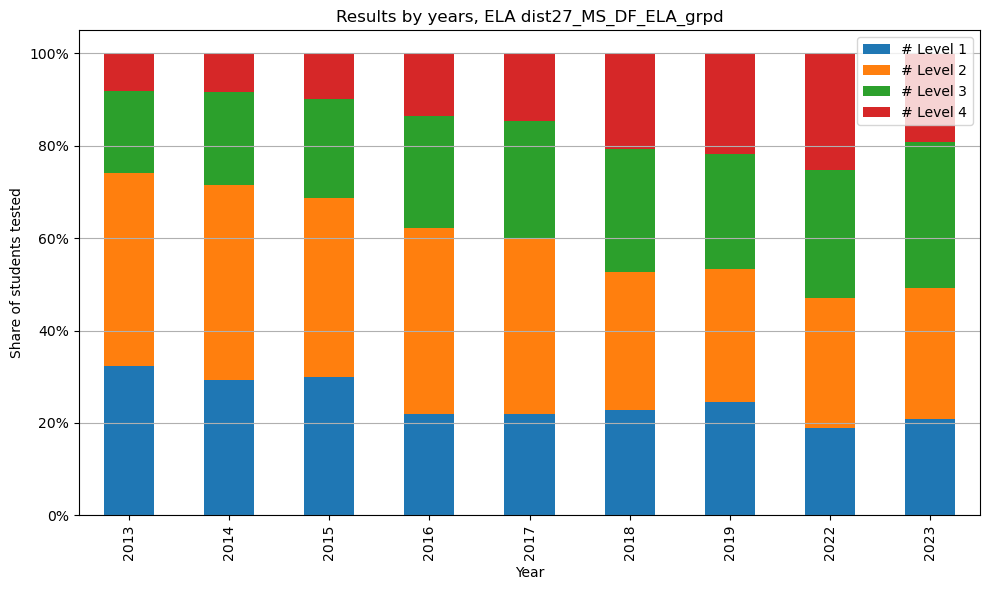

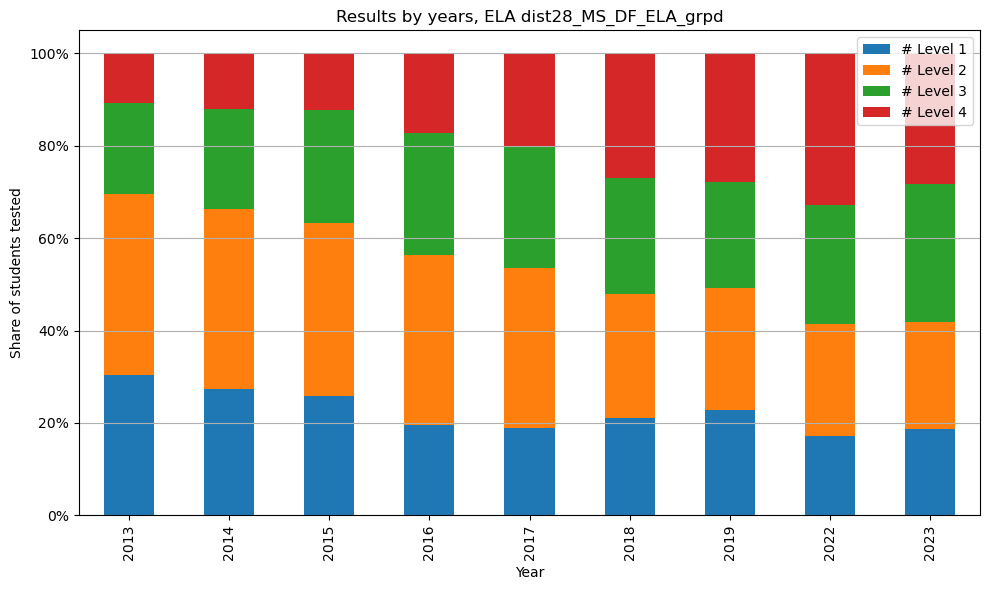

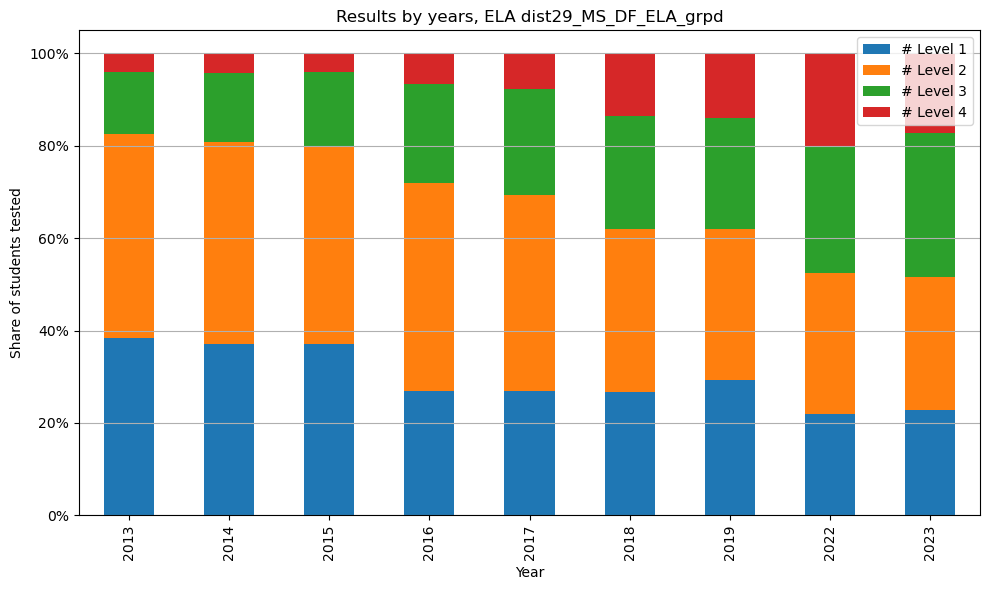

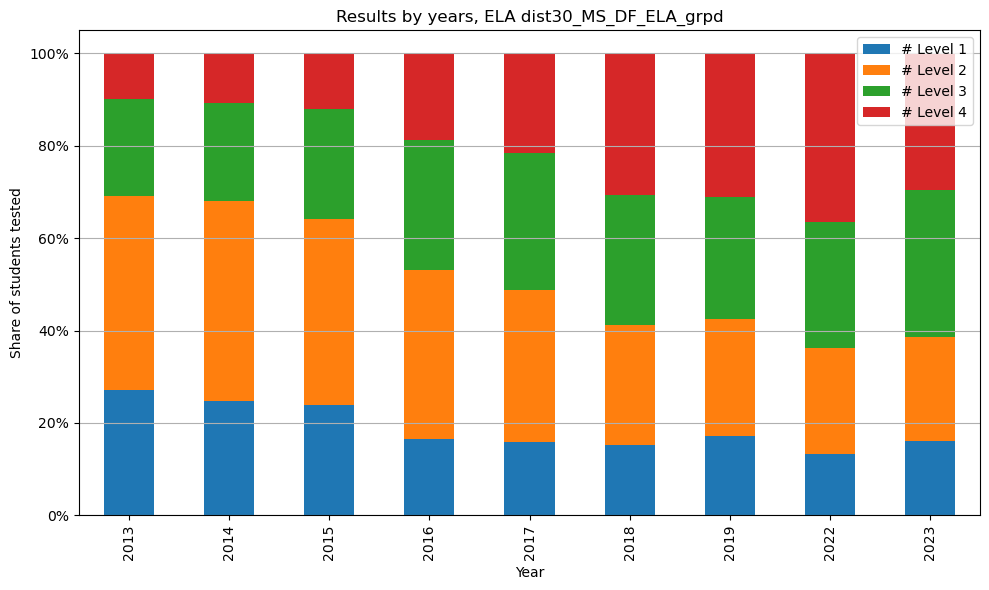

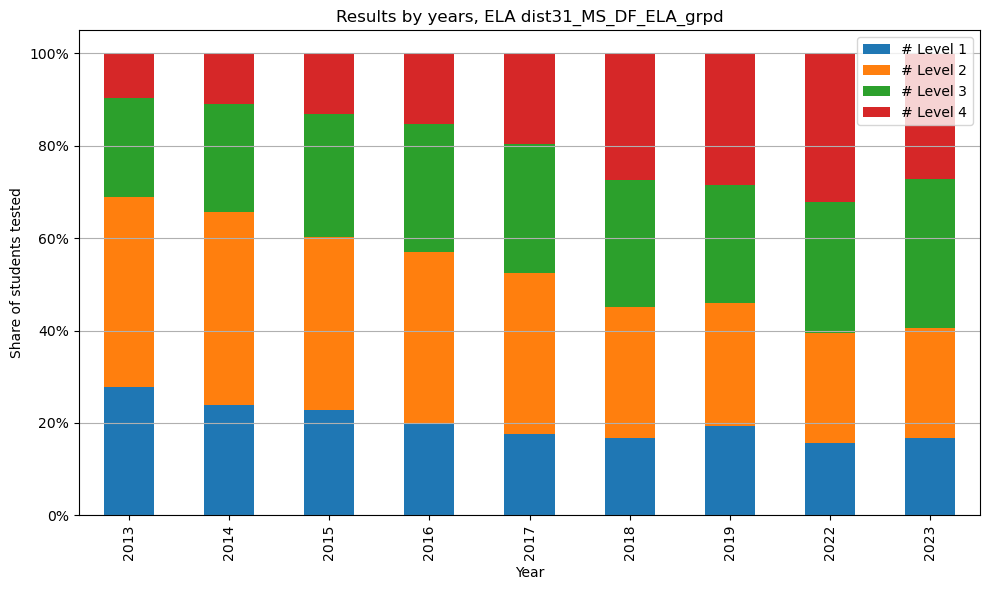

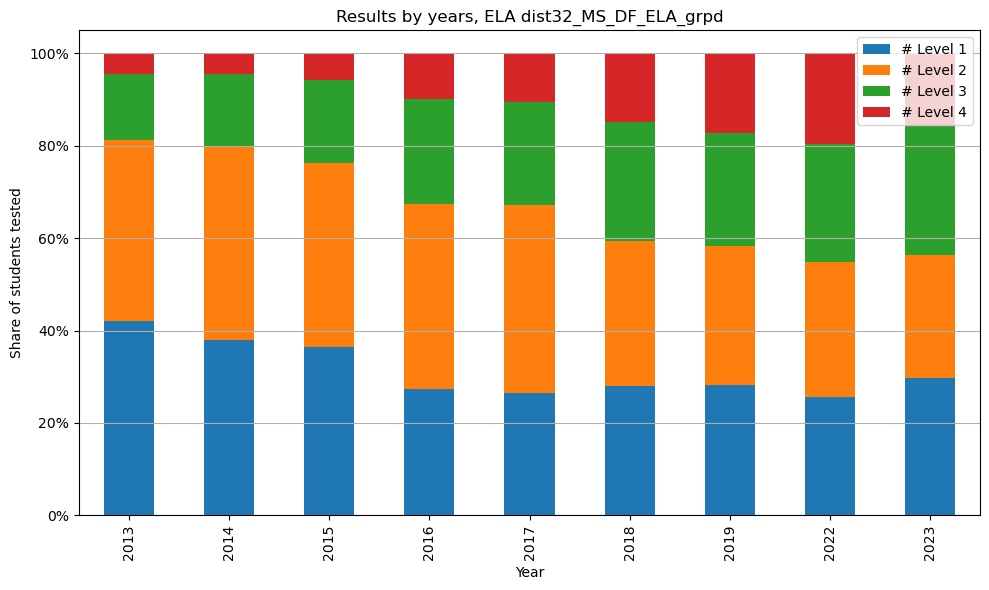

In [44]:
#Create a normalized bar chart for each dataframe in the district_dfs 
#1. Normalize the dataframe rows to sum to 1
for dfNameGrouped, current_dataframe in district_grouped_dfs.items():
    # dfNameGrouped contains the name of the dataframe
    # current_dataframe contains the dataframe itself
    # Do something with current_dataframe
    #current_dataframe.dropna()
    normalized_df = current_dataframe.div(current_dataframe.sum(axis=1), axis=0)

    # 2. Plot the normalized dataframe
    normalized_df.plot(kind='bar', stacked=True, figsize=(10,6))
    
    title = 'Results by years, ' + subject + ' ' + dfNameGrouped
    plt.title(title)  # Set the title
    plt.xlabel('Year')  # X-axis label
    plt.ylabel('Share of students tested')  # Y-axis label
    plt.grid(axis='y')
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])  # Adjust y-ticks to percentage

    plt.tight_layout()
    pdfTitle = title + '.pdf' 
    plt.savefig(pdfTitle) # Save output as a pdf
    plt.show()

In [66]:
# Produce a data frame with MS results by districts

## Prepare combined DF
districts_combined = pd.DataFrame()
## Select columns to normalize
columns_to_normalize = ['# Level 1', '# Level 2', '# Level 3', '# Level 4']


for dfNameGrouped, dataframe in district_grouped_dfs.items():
    for column in columns_to_normalize:
        # Calculate row sum for selected columns
        row_sum = dataframe[columns_to_normalize].sum(axis=1)
        dataframe[column] = dataframe[column].div(row_sum)
    # Select district number (simbols 5 and 6 from DF names)
    symbols = dfNameGrouped[4:6]
    # Create a new column with these symbols
    dataframe['District'] = symbols
    # Concatenate the data frames
    districts_combined = pd.concat([districts_combined, dataframe], ignore_index=False)

In [67]:
# Make sure that column "Years" is not index columnb
districts_combined.reset_index(inplace=True)
districts_combined.head()

,Year,# Level 1,# Level 2,# Level 3,# Level 4,District
0,2013,0.265,0.461,0.465,0.997,01
1,2014,0.214,0.438,0.518,0.997,01
2,2015,0.216,0.397,0.537,0.997,01
3,2016,0.156,0.425,0.535,0.997,01
4,2017,0.169,0.395,0.501,0.998,01


In [47]:
# Export the data frame with MS results by districts to excel file for future use
districts_combined.to_excel(f'DistrictsMS{subject}Norm.xlsx')

In [48]:
print(subject)

ELA
